# Dimensionality Reduction with Eigenvector / Eigenvalues and Correlation Matrix (PCA)

inspired by http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#eigendecomposition---computing-eigenvectors-and-eigenvalues

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import linalg as LA

from sklearn import datasets

In [2]:
iris = datasets.load_iris()

First we need the correlation matrix

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
corr = df.corr()
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


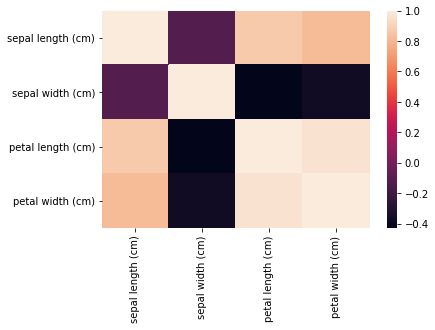

In [4]:
_ = sns.heatmap(corr)

In [5]:
eig_vals, eig_vecs = LA.eig(corr)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)


Eigenvalues

In [6]:
pd.DataFrame([eig_vals])

,0,1,2,3
0,2.918498,0.91403,0.146757,0.020715


Eigenvector as Principal component

In [7]:
pd.DataFrame(eig_vecs)

,0,1,2,3
0,0.521066,-0.377418,-0.719566,0.261286
1,-0.269347,-0.923296,0.244382,-0.123510
2,0.580413,-0.024492,0.142126,-0.801449
3,0.564857,-0.066942,0.634273,0.523597


Create the projection matrix for a new two dimensional space

In [8]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(len(corr),1),
                      eig_pairs[1][1].reshape(len(corr),1)))


pd.DataFrame(matrix_w, columns=['PC1', 'PC2'])

,PC1,PC2
0,0.521066,-0.377418
1,-0.269347,-0.923296
2,0.580413,-0.024492
3,0.564857,-0.066942


In [9]:
new_dim = np.dot(np.array(iris.data), matrix_w)

df = pd.DataFrame(new_dim, columns=['X', 'Y'])
df['label'] = iris.target
df.head()


,X,Y,label
0,2.640270,-5.204041,0
1,2.670730,-4.666910,0
2,2.454606,-4.773636,0
3,2.545517,-4.648463,0
4,2.561228,-5.258629,0


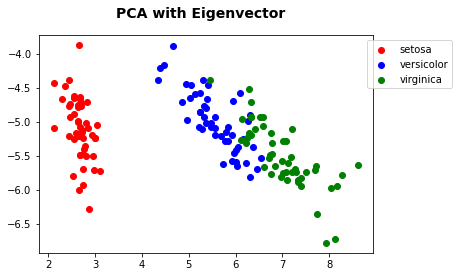

In [11]:
fig = plt.figure()
fig.suptitle('PCA with Eigenvector', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

plt.scatter(df[df.label == 0].X, df[df.label == 0].Y, color='red', label=iris.target_names[0])
plt.scatter(df[df.label == 1].X, df[df.label == 1].Y, color='blue', label=iris.target_names[1])
plt.scatter(df[df.label == 2].X, df[df.label == 2].Y, color='green', label=iris.target_names[2])

_ = plt.legend(bbox_to_anchor=(1.25, 1))
